In [54]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as pe

import geosample as gs

In [32]:
DATA = np.array(
    [
        [-90, 45],
        [-90, 44.3],
        [-87.9, 45],
        [-88, 46],
        [-87, 44],
        [-91, 43],
        [-88.7, 43.5],
        [-89, 44],
        [-85, 44],
    ]
)

In [33]:
def frame_from_coords(coords: np.ndarray) -> gpd.GeoDataFrame:
    geometry = [Point(*xy) for xy in coords]
    df = gpd.GeoDataFrame(
        data=range(coords.shape[0]), geometry=geometry, crs='epsg:4326'
    )

    return df

In [38]:
df = frame_from_coords(DATA)
qt = gs.QuadTree(df, force_square=False)
splits = []
n = 3
for i in range(n):
    qt.split()
    splits.append(qt.to_frame())
# qt.split_recursive(max_samples=1)
# samp_df = qt.sample(
#     n=2, weight_method='inverse-density', random_state=42
# )

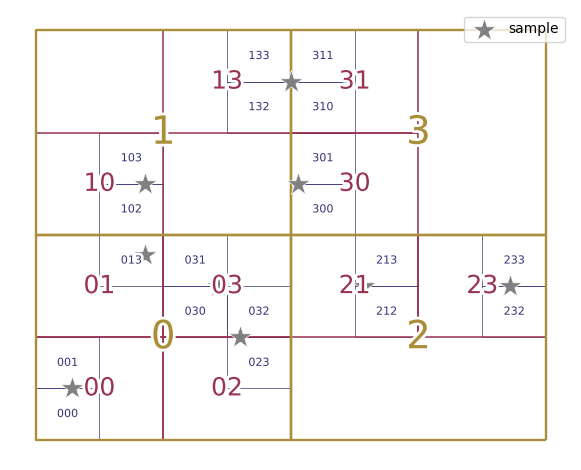

In [81]:
fig, ax = plt.subplots()

fontsize = 8
lw = 0.5
for l, (color, frame) in enumerate(zip(['#363377', '#983352', '#AA8E39', '#609732'], splits[::-1])):
    frame.plot(color='none', ec=color, lw=lw, ax=ax)    
    for row in frame.itertuples():
        ax.text(
            row.geometry.centroid.x,
            row.geometry.centroid.y,
            row.uid,
            size=fontsize,            
            color=color,
            ha='center',
            va='center',
            path_effects=[pe.withStroke(linewidth=4, foreground='white')],
        )
    fontsize += 10
    lw += 0.6

df.plot(color='grey', ec='white', lw=0.5, markersize=300, marker='*', label='sample', ax=ax)

ax.legend()
ax.axis('off')
plt.tight_layout()

In [51]:
nrows = 1
ncols = splits[-1].shape[0]
z = np.arange(nrows * ncols).reshape(nrows, ncols)
x = np.arange(ncols + 1)
y = np.arange(nrows + 1)

(0.0, 19.0, 0.0, 1.0)

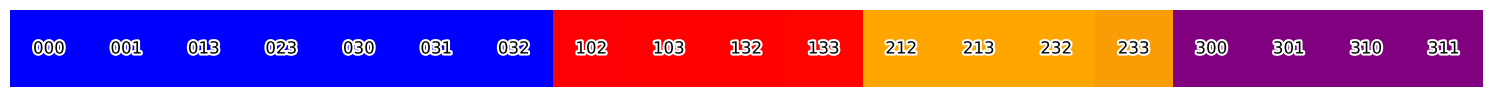

In [61]:
fig, ax = plt.subplots(figsize=(ncols, 1))

colors = []
for i, row in enumerate(splits[-1].itertuples()):
    if row.uid.startswith('0'):
        colors.append('blue')
    elif row.uid.startswith('1'):
        colors.append('red')  
    elif row.uid.startswith('2'):
        colors.append('orange')        
    elif row.uid.startswith('3'):
        colors.append('purple')        
cmap = LinearSegmentedColormap.from_list('', colors)
ax.pcolormesh(x, y, z, cmap=cmap)
for i, row in enumerate(splits[-1].itertuples()):
    ax.text(
        i + 0.5,
        0.5,
        row.uid,
        size=12,
        ha='center',
        va='center',
        path_effects=[pe.withStroke(linewidth=3, foreground='white')],
    )
ax.axis('off')